# Quantitative Seismology [Chapter 8 (BOX 8.1, page 336)]

Aki and Richards (2002) express the radial displacement over a homogeneous sphere in page 351 as:

$$ u_r = \sum_{n} \sum_{l} \mathstrut_n A_l . P_l(cos~\Delta) . [1 - exp(-\mathstrut_n \omega_l t/2 \mathstrut_n Q_l) cos~\mathstrut_n \omega_l t]$$

where

$$\mathstrut_n A_l = \left.\frac{2l + 1}{4\pi(\mathstrut_n \omega_l)^2} \left[\frac{d}{dr^n} \mathstrut_n U_l + \frac{2\mathstrut_n U_l}{r} - \frac{\sqrt{l (l + 1)}}{r}\mathstrut_n V_l \right]\right\rvert_{r = r_s} \mathstrut_n U_l(r)$$

and

$$P_l(cos~\Delta) \sim \left(\frac{2}{(l + \frac{1}{2})\pi sin~\Delta}\right)^{1/2}~cos[(l + \frac{1}{2})\Delta - \pi/4].$$

Therefore, the radial amplitudes are controlled by the Lengendre polynomial $P_l$.

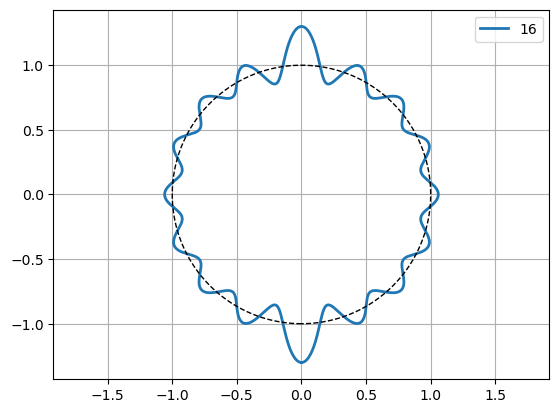

In [1]:
from scipy.special import eval_legendre
import numpy as np
import matplotlib.pyplot as plt

N = 1000 # number of points to discretize the interval  into
epicentral_distance = np.linspace(-np.pi, np.pi, N)
x = np.cos(epicentral_distance)

R = 1.0
n = 16 # Order of polynomial
plt.figure()
u_r = R + 0.3*R*eval_legendre(n, x) # Radial displacement amplitude    
plt.plot(u_r*np.sin(epicentral_distance), u_r*np.cos(epicentral_distance), lw = 2, label = str(n))
plt.plot(R*np.sin(epicentral_distance), R*np.cos(epicentral_distance), c = 'k', ls = '--', lw = 1)
plt.legend()
plt.axis('equal')
plt.grid(True)

# Find the roots (number of nodes)

The roots would be the zero-crossings of the function. The cell below calculates the zero-crossings or nodes of the Legendre polynomial of order $n$.

In [2]:
from scipy import optimize
def f(x):
    return eval_legendre(n, x)

ROOTS = []
r = 0
incre = u_r[int(N/2)] 
for j in range(10**6):
    past = incre
    val1 = f(incre)
    incre =  incre - 0.001
    val2 = f(incre)
    if (np.real(val1) * np.real(val2) <= 0):
        root =  optimize.brentq(f,incre, past) 
        ROOTS.append(root)
        r = r + 1
        #print(root)
print('Order of Legendre polynomial', n)
print('Number of roots found: ', r)

Order of Legendre polynomial 16
Number of roots found:  16


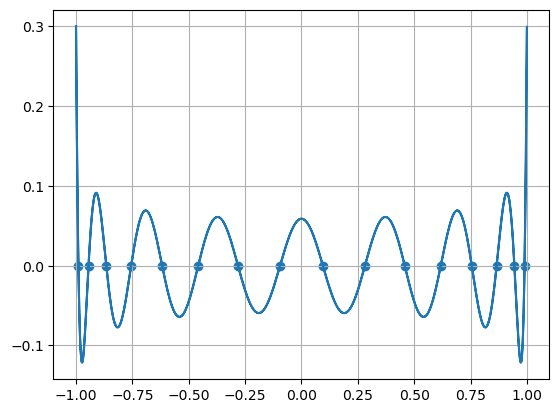

In [3]:
# Plot the roots
plt.plot(x,u_r - R)
plt.scatter(ROOTS, np.zeros(len(ROOTS)))
plt.grid(True)

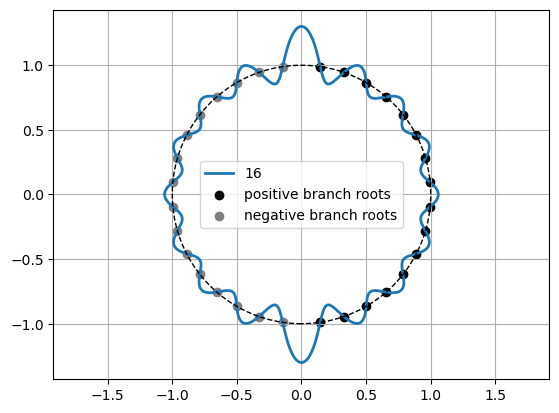

In [4]:
epicentral_root = np.acos(ROOTS)

plt.figure()
u_r = R + 0.3*R*eval_legendre(n, x) # Radial displacement amplitude    
plt.plot(u_r*np.sin(epicentral_distance), u_r*np.cos(epicentral_distance), lw = 2, label = str(n))
plt.plot(R*np.sin(epicentral_distance), R*np.cos(epicentral_distance), c = 'k', ls = '--', lw = 1)
plt.scatter(np.sin(epicentral_root), np.cos(epicentral_root), c='k', label = 'positive branch roots')
plt.scatter(np.sin(-epicentral_root), np.cos(-epicentral_root), c='gray', label = 'negative branch roots')
plt.legend()
plt.axis('equal')
plt.grid(True)


# Plot several modes

A few even modes plotted together. 

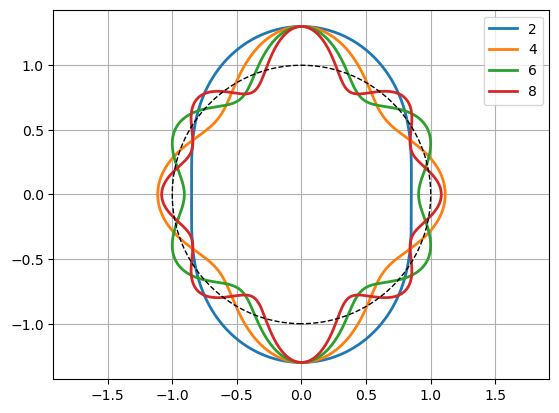

In [5]:
R = 1.0
n = 8 # Order of polynomial
plt.figure()
for n in range(2, n + 1, 2): 
    u_r = R + 0.3*R*eval_legendre(n, x) # Radial displacement amplitude    
    plt.plot(u_r*np.sin(epicentral_distance), u_r*np.cos(epicentral_distance), lw = 2, label = str(n))
plt.plot(R*np.sin(epicentral_distance), R*np.cos(epicentral_distance), c = 'k', ls = '--', lw = 1)
plt.legend()
plt.axis('equal')
plt.grid(True)